## Using Geopandas to make raster mask

In [34]:
import rasterio
import geopandas as gpd
from shapely.geometry import box, Point
import matplotlib.pyplot as plt

from pyproj import CRS

import cartopy.crs as ccrs

geom = [shape for shape in coastline.geometries()]

In [223]:
def get_clip_box(this_point, resolution, nx, ny):
    px, py = point_gdf[location].x, point_gdf[location].y
    pcol, prow = ~dummy.rio.transform() * (px, py)
    gcol, grow = np.round(pcol), np.round(prow)
    gx, gy = dummy.rio.transform() * (gcol, grow)
    dx, dy = resolution
    clip_box = [gx-(dx*nx), gy-(dy*ny), gx+(dx*nx), gy+(dy*ny)] 
    return clip_box

In [205]:
filepath = "/home/apbarret/Data/GSHHG/GSHHS_shp/h/GSHHS_h_L1.shp"
gdf = gpd.read_file(filepath)
gdf.head()

,id,level,source,parent_id,sibling_id,area,geometry
0,0-E,1,WVS,-1,0,5.065405e+07,"POLYGON ((180.00000 68.99378, 180.00000 65.034..."
1,0-W,1,WVS,-1,0,5.065405e+07,"POLYGON ((-180.00000 68.99378, -179.99844 68.9..."
2,1,1,WVS,-1,1,2.922097e+07,"POLYGON ((32.28458 31.22667, 32.28450 31.23281..."
3,2,1,WVS,-1,2,2.015474e+07,"POLYGON ((-79.94869 9.31397, -79.92538 9.31240..."
4,3,1,WVS,-1,3,1.753416e+07,"POLYGON ((-73.36172 -53.00042, -73.36261 -53.0..."


In [206]:
len(gdf)

144749

<Axes: >

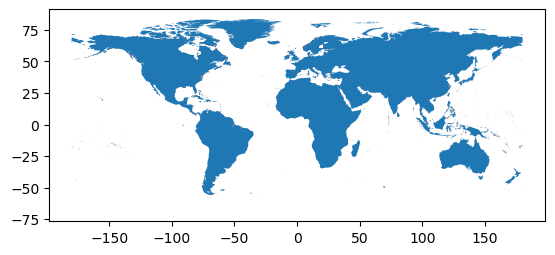

In [207]:
gdf.plot()

In [208]:
gdf.set_crs(4326, inplace=True)

,id,level,source,parent_id,sibling_id,area,geometry
0,0-E,1,WVS,-1,0,5.065405e+07,"POLYGON ((180.00000 68.99378, 180.00000 65.034..."
1,0-W,1,WVS,-1,0,5.065405e+07,"POLYGON ((-180.00000 68.99378, -179.99844 68.9..."
2,1,1,WVS,-1,1,2.922097e+07,"POLYGON ((32.28458 31.22667, 32.28450 31.23281..."
3,2,1,WVS,-1,2,2.015474e+07,"POLYGON ((-79.94869 9.31397, -79.92538 9.31240..."
4,3,1,WVS,-1,3,1.753416e+07,"POLYGON ((-73.36172 -53.00042, -73.36261 -53.0..."
...,...,...,...,...,...,...,...
144744,145412,1,WVS,-1,170134,1.404236e-02,"POLYGON ((-107.61875 66.91806, -107.61717 66.9..."
144745,145413,1,WVS,-1,170305,1.370633e-02,"POLYGON ((-119.40472 77.24386, -119.40653 77.2..."
144746,145414,1,WVS,-1,170667,1.331322e-02,"POLYGON ((-119.85378 77.06967, -119.85378 77.0..."
144747,145415,1,WVS,-1,172050,1.271869e-02,"POLYGON ((-119.94606 77.03406, -119.94550 77.0..."


In [209]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

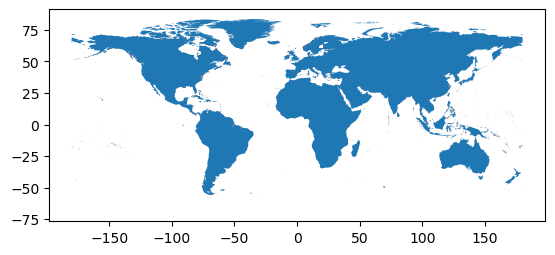

In [210]:
gdf.plot()

In [211]:
gdf.total_bounds

array([-180.      ,  -68.924526,  180.      ,   83.633389])

## Reproject to NSIDC WGS84 North Polar Stereographic: EPSG:3413

In [212]:
# Create a custom polygon
polygon = box(-180, 50, 180, 90)
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=gdf.crs)

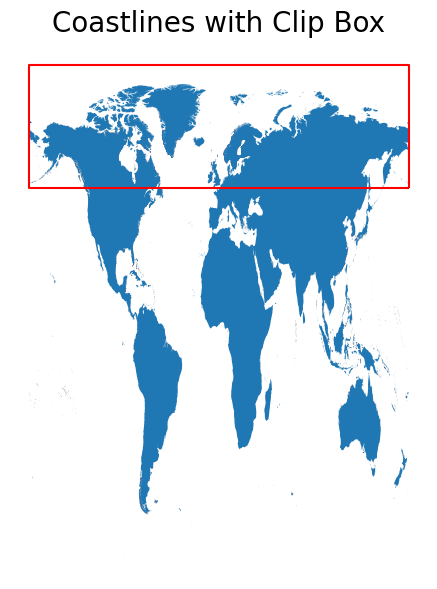

In [213]:
fig, ax = plt.subplots(figsize=(12, 7))
gdf.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("Coastlines with Clip Box", fontsize=20)
ax.set_axis_off()

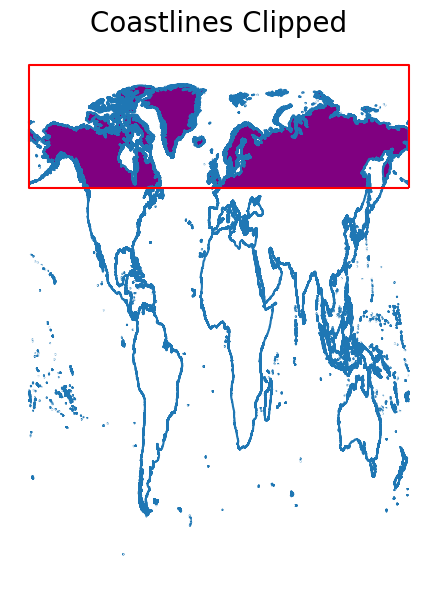

In [214]:
coastlines_clipped = gdf.clip(poly_gdf)

fig, ax = plt.subplots(figsize=(12, 7))
coastlines_clipped.plot(ax=ax, color="purple")
gdf.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("Coastlines Clipped", fontsize=20)
ax.set_axis_off()

In [221]:
## Add a `land` attribute

In [217]:
coastlines_clipped["land"] = 1

### Define a grid for testing purposes

Assume 25000 m by 25000 m cells.  This is roughly a 950 x 950 grid.  Assume center column and row is (475,475).

In [19]:
import rioxarray
import xarray as xr
import numpy as np

In [20]:
x, y = IMS4kmGrid.xy_coords()
dummy = xr.DataArray(np.zeros((IMS4kmGrid.ncol, IMS4kmGrid.nrow), dtype="byte"), dims=["y", "x"], coords={"x": x, "y": y})

In [21]:
dummy.rio.set_crs(IMS4kmGrid.crs)

<xarray.DataArray (y: 6144, x: 6144)> Size: 38MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)
Coordinates:
  * x        (x) float64 49kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07
  * y        (y) float64 49kB -1.229e+07 -1.228e+07 ... 1.228e+07 1.229e+07

In [226]:
from notebooks.utils import plot_ims_snow_and_ice, get_extent

test_point = {
    "Norton Sound": (-163.01706271914878, 64.54757445721512),
    "Cambridge Bay": (-105.05586791647777, 69.11608384685066),
    "Clyde River": (-68.59767446082255, 70.47531698648856),
    "Tiksi": (128.76156219329152, 71.70659836968615),
}

point_gdf = gpd.GeoSeries([Point(*p) for p in test_point.values()], index=test_point.keys(), crs=4326).to_crs(IMS4kmGrid.crs)
point_gdf

Norton Sound     POINT (-2675350.674 -327683.055)
Cambridge Bay    POINT (-931674.792 -1992907.285)
Clyde River       POINT (406060.782 -2013415.301)
Tiksi             POINT (-924903.068 1685069.214)
dtype: geometry

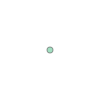

In [245]:
location = "Norton Sound"
point_gdf.loc[location]

In [246]:
bounds = get_clip_box(point_gdf.loc[location], dummy.rio.resolution(), 20, 20)

In [247]:
dummy_clip = dummy.rio.clip_box(*get_clip_box(point_gdf.loc[location], dummy.rio.resolution(), 20, 20))

In [248]:
from geocube.api.core import make_geocube

In [249]:
%%time
raster_coastlines = make_geocube(coastlines_clipped,
                                 measurements=["land"],
                                 fill = 0, 
                                 #resolution=(4000.,4000.),
                                 like=dummy_clip,
                                 #interpolate_na_method="nearest",
                                )
raster_coastlines

CPU times: user 2.95 s, sys: 7.05 ms, total: 2.95 s
Wall time: 2.95 s


<xarray.Dataset> Size: 13kB
Dimensions:      (y: 40, x: 40)
Coordinates:
  * y            (y) float64 320B -4.06e+05 -4.02e+05 ... -2.54e+05 -2.5e+05
  * x            (x) float64 320B -2.754e+06 -2.75e+06 ... -2.602e+06 -2.598e+06
    spatial_ref  int64 8B 0
Data variables:
    land         (y, x) int64 13kB 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1

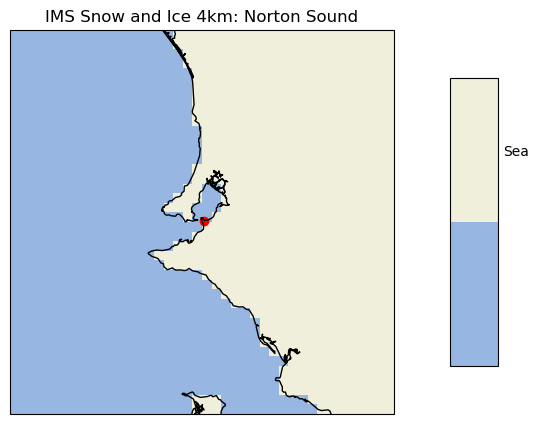

In [250]:
from notebooks.utils import LAND_MASK_CMAP, LAND_MASK_NORM
extent = [bounds[i] for i in [0, 2, 1, 3]]  #get_extent(test_point[location], raster_coastlines, fov=200000.)
ax = plot_ims_snow_and_ice(raster_coastlines.land, title=f"IMS Snow and Ice 4km: {location}", extent=extent,
                           cmap=LAND_MASK_CMAP, norm=LAND_MASK_NORM)
ax.scatter(*test_point[location], marker='o', color="red", transform=ccrs.PlateCarree())